In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

import pandas as pd

# Path to a benchmark CSV, e.g. produced by bench-mphf-hashing
DATA_ROOT = Path("../..") / "data"
CSV_PATH = DATA_ROOT / "mphf_hashing_bench_full.csv"  # adjust as needed

df = pd.read_csv(CSV_PATH)

In [4]:
df

,strategy,n,seed,build_time_us,query_time_us,query_time_ns_per_key,size_bytes,bits_per_key,m,m_over_n,retries,build_success
0,BaselineStorage,1000,1042,2406,774,154.800,656,5.24800,1271,1.27100,0,1
1,PackedTritStorage_ExplicitB,1000,1042,1363,1204,240.800,532,4.25600,1271,1.27100,0,1
2,PackedTritStorage_CompressedB,1000,1042,1089,13397,2679.400,510,4.08000,1271,1.27100,0,1
3,GlGhStorage,1000,1042,1366,834,166.800,496,3.96800,1271,1.27100,0,1
4,BaselineStorage,10000,10042,12127,8699,173.980,5256,4.20480,12589,1.25890,0,1
5,PackedTritStorage_ExplicitB,10000,10042,12263,10784,215.680,4100,3.28000,12589,1.25890,0,1
6,PackedTritStorage_CompressedB,10000,10042,8659,117302,2346.040,3374,2.69920,12589,1.25890,0,1
7,GlGhStorage,10000,10042,8161,6054,121.080,3680,2.94400,12589,1.25890,0,1
8,BaselineStorage,100000,100042,103863,70050,140.100,50944,4.07552,125037,1.25037,0,1
9,PackedTritStorage_ExplicitB,100000,100042,98056,104111,208.222,39676,3.17408,125037,1.25037,0,1


In [5]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

strategies = df["strategy"].unique()
strategies


array(['BaselineStorage', 'PackedTritStorage_ExplicitB',
       'PackedTritStorage_CompressedB', 'GlGhStorage'], dtype=object)

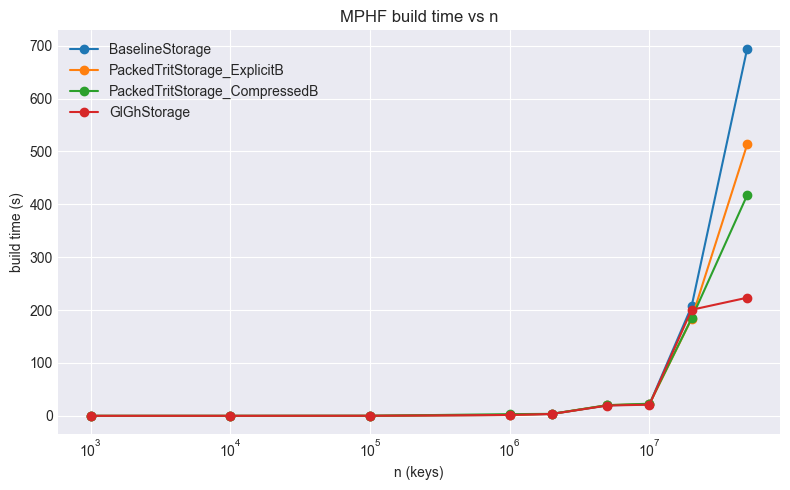

In [6]:
# Build time vs n (seconds) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["build_time_us"] / 1e6, marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("build time (s)")
ax.set_title("MPHF build time vs n")
ax.legend()
fig.tight_layout()


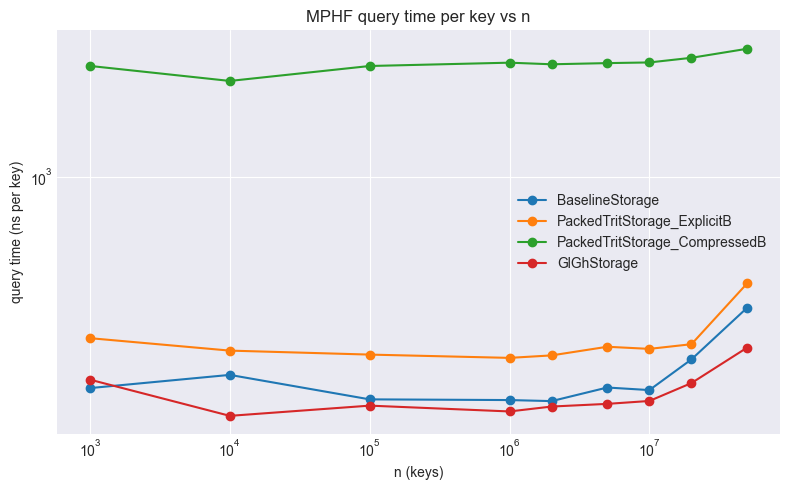

In [7]:
# Query time per key vs n (ns) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["query_time_ns_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("query time (ns per key)")
ax.set_title("MPHF query time per key vs n")
ax.legend()
fig.tight_layout()

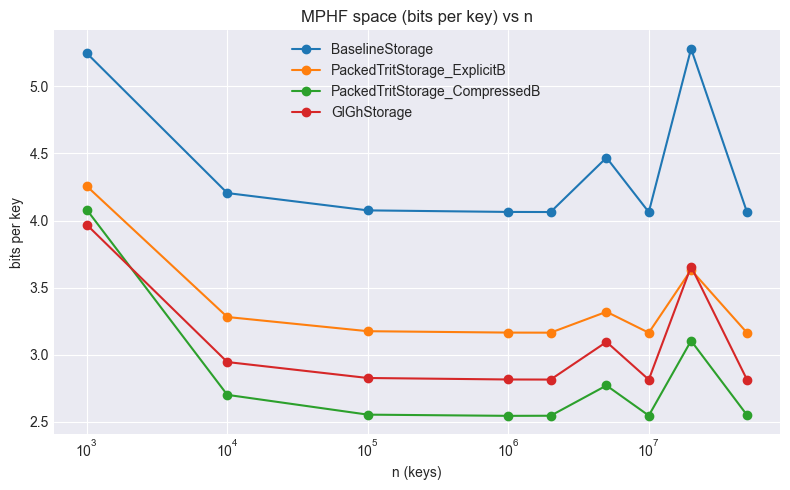

In [8]:
# Bits per key vs n per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["bits_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("bits per key")
ax.set_title("MPHF space (bits per key) vs n")
ax.legend()
fig.tight_layout()


In [15]:
# tablita valores 50M
size = 50_000_000

results = df[df["n"] == size][["strategy", "build_time_us", "query_time_ns_per_key", "bits_per_key"]].copy()
results["Build time (s)"] = results["build_time_us"] / 1e6
results["Query time (ns/key)"] = results["query_time_ns_per_key"]
results["Bits per key"] = results["bits_per_key"]
results = results[["strategy", "Build time (s)", "Query time (ns/key)", "Bits per key"]].round(2)
results


,strategy,Build time (s),Query time (ns/key),Bits per key
32,BaselineStorage,694.42,315.20,4.06
33,PackedTritStorage_ExplicitB,513.25,391.00,3.16
34,PackedTritStorage_CompressedB,417.36,3119.05,2.55
35,GlGhStorage,223.45,221.48,2.81
